<a href="https://colab.research.google.com/github/preetamjumech/feature_clustering_hierarchical_clustering/blob/main/Feature_Clustering_31_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
# https://www.kaggle.com/datasets/conorsully1/credit-score?resource=download

credit_score = pd.read_csv('credit_score.csv')
credit_score.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


In [25]:
df_features = credit_score.drop(columns=['CUST_ID','CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE',
                                         'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT'], axis = 1)


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled, columns = df_features.columns)
df_scaled.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_UTILITIES,R_UTILITIES_INCOME,R_UTILITIES_SAVINGS,R_UTILITIES_DEBT,T_EXPENDITURE_12,T_EXPENDITURE_6,R_EXPENDITURE,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT
0,-0.777240,-0.933351,-0.263339,-1.024549,1.699167,-0.278144,-0.659327,-0.492793,0.192660,0.033098,...,0.706994,-1.033164,0.611326,-0.434872,-0.796608,-0.701635,0.842411,0.333879,-0.562241,-0.417928
1,-0.391097,-0.727370,-0.484123,-0.726575,-0.338334,-0.143371,-0.134234,-0.655799,-1.847030,0.528442,...,-1.230861,-0.688195,-0.038438,-0.344009,-0.383236,-0.584675,-1.939268,-0.204296,-0.088731,-0.294962
2,-0.797934,-0.884465,-0.260730,-0.848054,1.921581,1.123182,-0.757155,-0.509407,1.222678,-0.483552,...,0.868482,-1.044792,0.118793,-0.436117,-0.822974,-0.735109,0.718195,0.333879,0.317187,-0.421547
3,-0.360312,-0.787594,-0.164673,-0.822840,0.296247,0.231386,0.004624,0.042937,0.350766,0.784103,...,0.491677,-1.056420,0.018392,-0.412468,-0.265385,-0.281819,-0.176409,0.333879,0.207243,-0.367340
4,0.249525,1.715197,1.639472,0.946701,1.699167,-0.227697,-0.647432,-0.614559,-1.237920,-1.128032,...,-0.261933,0.552145,-0.462774,-0.402510,0.358791,0.170949,-0.654451,-0.204296,-0.490648,-0.422317


In [26]:
df_transposed = df_scaled.T
df_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
INCOME,-0.777240,-0.391097,-0.797934,-0.360312,0.249525,0.528120,-0.534305,0.873026,-0.378278,0.460937,...,2.350998,-0.154998,-0.720668,0.627988,-0.904277,1.823705,-0.353740,-1.069947,-0.753116,-0.680487
SAVINGS,-0.933351,-0.727370,-0.884465,-0.787594,1.715197,-0.167462,-0.837084,-0.511248,-0.791285,2.461154,...,0.091346,-0.762509,-0.036593,0.853992,-0.928034,2.376077,-0.732750,-0.837511,-0.915276,-0.233413
DEBT,-0.263339,-0.484123,-0.260730,-0.164673,1.639472,0.921794,-0.414927,1.461984,-0.693628,-0.386676,...,1.538597,0.051645,-0.801741,0.590533,-0.405228,4.800526,-0.111975,-0.774441,-0.190092,-0.760677
R_SAVINGS_INCOME,-1.024549,-0.726575,-0.848054,-0.822840,0.946701,-0.553887,-0.848054,-0.811192,-0.822840,1.152999,...,-0.730382,-0.841171,1.496812,0.009209,-0.993032,0.098616,-0.749494,-0.208158,-0.968525,0.740378
R_DEBT_INCOME,1.699167,-0.338334,1.921581,0.296247,1.699167,0.558593,0.039616,0.685797,-0.798715,-0.633854,...,-0.025962,0.346017,-1.021129,0.176486,2.533151,1.823599,0.392689,0.362783,1.832222,-0.867150


In [27]:
np.shape(df_transposed)

(78, 1000)

In [28]:
df_transposed.index

Index(['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING',

In [29]:
linked = linkage(df_transposed, method = 'ward', metric = 'euclidean')
np.shape(linked)

(77, 4)

In [30]:
linked

array([[4.80000000e+01, 4.90000000e+01, 1.11485183e-03, 2.00000000e+00],
       [1.20000000e+01, 1.30000000e+01, 1.10212539e-01, 2.00000000e+00],
       [6.60000000e+01, 6.70000000e+01, 1.40090944e-01, 2.00000000e+00],
       [5.40000000e+01, 5.50000000e+01, 2.91714761e+00, 2.00000000e+00],
       [3.00000000e+01, 3.10000000e+01, 3.25680932e+00, 2.00000000e+00],
       [3.60000000e+01, 3.70000000e+01, 4.09498772e+00, 2.00000000e+00],
       [0.00000000e+00, 7.20000000e+01, 5.36817460e+00, 2.00000000e+00],
       [1.80000000e+01, 1.90000000e+01, 5.88176138e+00, 2.00000000e+00],
       [7.30000000e+01, 8.40000000e+01, 8.53116563e+00, 3.00000000e+00],
       [4.10000000e+01, 7.10000000e+01, 9.64404470e+00, 2.00000000e+00],
       [6.00000000e+01, 6.10000000e+01, 9.74800957e+00, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 1.30323430e+01, 2.00000000e+00],
       [4.20000000e+01, 4.30000000e+01, 1.32420159e+01, 2.00000000e+00],
       [7.70000000e+01, 8.70000000e+01, 1.54872977e

In [31]:
df_linked = pd.DataFrame(linked, columns = ['C1', 'C2', 'distance', 'size'])
df_linked[['C1', 'C2', 'size']] = df_linked[['C1', 'C2', 'size']] .astype(int)
df_linked.head()

,C1,C2,distance,size
0,48,49,0.001115,2
1,12,13,0.110213,2
2,66,67,0.140091,2
3,54,55,2.917148,2
4,30,31,3.256809,2


Text(0, 0.5, "Ward's Distance")

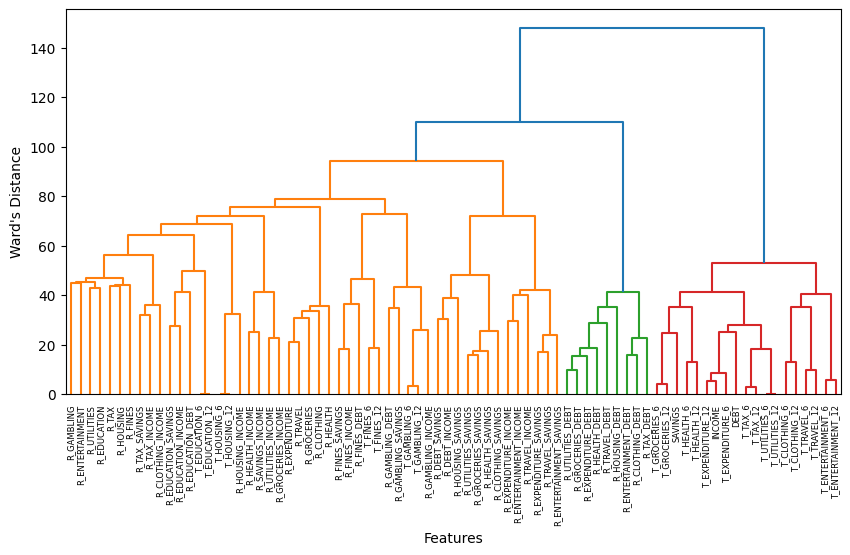

In [32]:
plt.figure(figsize= (10,5))

dendrogram(linked,
           orientation = 'top',
           labels = df_transposed.index,
           distance_sort = 'descending',
           show_leaf_counts = True)

plt.xlabel("Features")
plt.ylabel("Ward's Distance")

In [33]:
# Group features into clusters
num_clusters = 10
labels = fcluster(linked, t = num_clusters, criterion = 'maxclust')
labels

array([ 1,  1,  1,  8,  4,  4,  1,  1,  7, 10,  4,  2, 10, 10, 10, 10, 10,
       10,  1,  1, 10,  3,  3,  2,  6,  6, 10,  6,  6,  6,  5,  5, 10,  5,
        5,  5,  1,  1,  7,  8,  4,  2,  1,  1,  7,  8,  4,  2,  9,  9, 10,
        9,  4,  2,  1,  1, 10, 10, 10,  2,  1,  1,  7,  3,  3,  2,  1,  1,
       10,  8,  4,  2,  1,  1,  7,  3,  3,  2], dtype=int32)

In [34]:
correlations = []

for col in df_features.columns:
    corr = credit_score['CREDIT_SCORE'].corr(credit_score[col])
    corr = round(corr, 3)
    correlations.append((col, corr))

In [35]:
correlations

[('INCOME', 0.029),
 ('SAVINGS', 0.079),
 ('DEBT', -0.327),
 ('R_SAVINGS_INCOME', 0.248),
 ('R_DEBT_INCOME', -0.858),
 ('R_DEBT_SAVINGS', -0.454),
 ('T_CLOTHING_12', 0.007),
 ('T_CLOTHING_6', -0.018),
 ('R_CLOTHING', -0.069),
 ('R_CLOTHING_INCOME', -0.045),
 ('R_CLOTHING_SAVINGS', -0.086),
 ('R_CLOTHING_DEBT', 0.24),
 ('T_EDUCATION_12', -0.094),
 ('T_EDUCATION_6', -0.094),
 ('R_EDUCATION', 0.002),
 ('R_EDUCATION_INCOME', -0.303),
 ('R_EDUCATION_SAVINGS', -0.195),
 ('R_EDUCATION_DEBT', 0.11),
 ('T_ENTERTAINMENT_12', 0.109),
 ('T_ENTERTAINMENT_6', 0.084),
 ('R_ENTERTAINMENT', -0.145),
 ('R_ENTERTAINMENT_INCOME', 0.17),
 ('R_ENTERTAINMENT_SAVINGS', 0.077),
 ('R_ENTERTAINMENT_DEBT', 0.28),
 ('T_FINES_12', -0.032),
 ('T_FINES_6', -0.069),
 ('R_FINES', -0.046),
 ('R_FINES_INCOME', -0.054),
 ('R_FINES_SAVINGS', -0.058),
 ('R_FINES_DEBT', 0.053),
 ('T_GAMBLING_12', -0.078),
 ('T_GAMBLING_6', -0.079),
 ('R_GAMBLING', -0.023),
 ('R_GAMBLING_INCOME', -0.159),
 ('R_GAMBLING_SAVINGS', -0.08),
 ('R_

In [41]:
len(correlations)

78

In [37]:
df_clusters = pd.DataFrame(list(zip(df_features.columns, labels, [c[1] for c in correlations])),
                           columns = ['feature', 'cluster', 'corr'])
df_clusters["abs_corr"] = df_clusters["corr"].abs()
df_clusters.sort_values(by = ['cluster', 'abs_corr'], ascending = [True,False], inplace = True)
df_clusters.reset_index(drop = True, inplace = True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,DEBT,1,-0.327,0.327
1,T_ENTERTAINMENT_12,1,0.109,0.109
2,T_ENTERTAINMENT_6,1,0.084,0.084
3,T_GROCERIES_6,1,-0.081,0.081
4,SAVINGS,1,0.079,0.079
5,T_GROCERIES_12,1,-0.073,0.073
6,T_HEALTH_12,1,0.057,0.057
7,T_TAX_12,1,0.038,0.038
8,T_TAX_6,1,0.036,0.036
9,INCOME,1,0.029,0.029


In [40]:
c2_features = df_clusters[df_clusters['cluster'] == 2]['feature'].tolist()
c3_features = df_clusters[df_clusters['cluster'] == 3]['feature'].tolist()

print(c2_features)
print(c3_features)

['R_EXPENDITURE_DEBT', 'R_UTILITIES_DEBT', 'R_GROCERIES_DEBT', 'R_TAX_DEBT', 'R_ENTERTAINMENT_DEBT', 'R_HEALTH_DEBT', 'R_CLOTHING_DEBT', 'R_TRAVEL_DEBT', 'R_HOUSING_DEBT']
['R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_INCOME', 'R_TRAVEL_SAVINGS', 'R_TRAVEL_INCOME']


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'R_EXPENDITURE_DEBT'),
  Text(0, 1.5, 'R_UTILITIES_DEBT'),
  Text(0, 2.5, 'R_GROCERIES_DEBT'),
  Text(0, 3.5, 'R_TAX_DEBT'),
  Text(0, 4.5, 'R_ENTERTAINMENT_DEBT'),
  Text(0, 5.5, 'R_HEALTH_DEBT'),
  Text(0, 6.5, 'R_CLOTHING_DEBT'),
  Text(0, 7.5, 'R_TRAVEL_DEBT'),
  Text(0, 8.5, 'R_HOUSING_DEBT')])

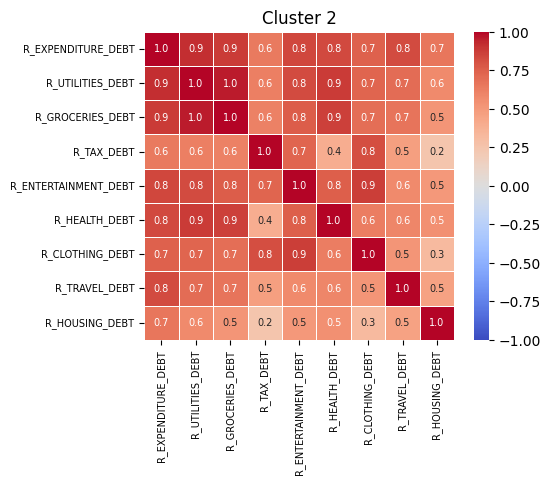

In [50]:
corr = credit_score[c2_features].corr()

plt.figure(figsize = (5,4))
sns.heatmap(corr,
            annot = True,
            cmap = 'coolwarm',
            linewidths=0.5,
            fmt = '.1f',
            annot_kws = {'size': 7},
            vmin = -1, vmax = 1)
plt.title('Cluster 2')
plt.xticks(size = 7)
plt.yticks(size = 7)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'R_ENTERTAINMENT_INCOME'),
  Text(0, 1.5, 'R_ENTERTAINMENT_SAVINGS'),
  Text(0, 2.5, 'R_EXPENDITURE_SAVINGS'),
  Text(0, 3.5, 'R_EXPENDITURE_INCOME'),
  Text(0, 4.5, 'R_TRAVEL_SAVINGS'),
  Text(0, 5.5, 'R_TRAVEL_INCOME')])

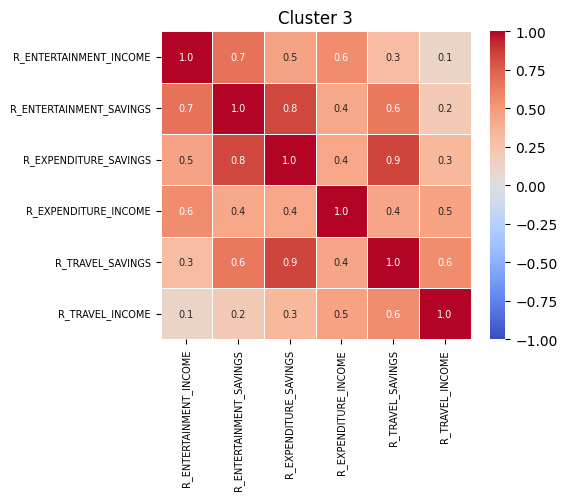

In [51]:
corr = credit_score[c3_features].corr()

plt.figure(figsize = (5,4))
sns.heatmap(corr,
            annot = True,
            cmap = 'coolwarm',
            linewidths=0.5,
            fmt = '.1f',
            annot_kws = {'size': 7},
            vmin = -1, vmax = 1)
plt.title('Cluster 3')
plt.xticks(size = 7)
plt.yticks(size = 7)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, 'R_EXPENDITURE_DEBT'),
  Text(0, 1.5, 'R_UTILITIES_DEBT'),
  Text(0, 2.5, 'R_GROCERIES_DEBT'),
  Text(0, 3.5, 'R_TAX_DEBT'),
  Text(0, 4.5, 'R_ENTERTAINMENT_DEBT'),
  Text(0, 5.5, 'R_HEALTH_DEBT'),
  Text(0, 6.5, 'R_CLOTHING_DEBT'),
  Text(0, 7.5, 'R_TRAVEL_DEBT'),
  Text(0, 8.5, 'R_HOUSING_DEBT'),
  Text(0, 9.5, 'R_ENTERTAINMENT_INCOME'),
  Text(0, 10.5, 'R_ENTERTAINMENT_SAVINGS'),
  Text(0, 11.5, 'R_EXPENDITURE_SAVINGS'),
  Text(0, 12.5, 'R_EXPENDITURE_INCOME'),
  Text(0, 13.5, 'R_TRAVEL_SAVINGS'),
  Text(0, 14.5, 'R_TRAVEL_INCOME')])

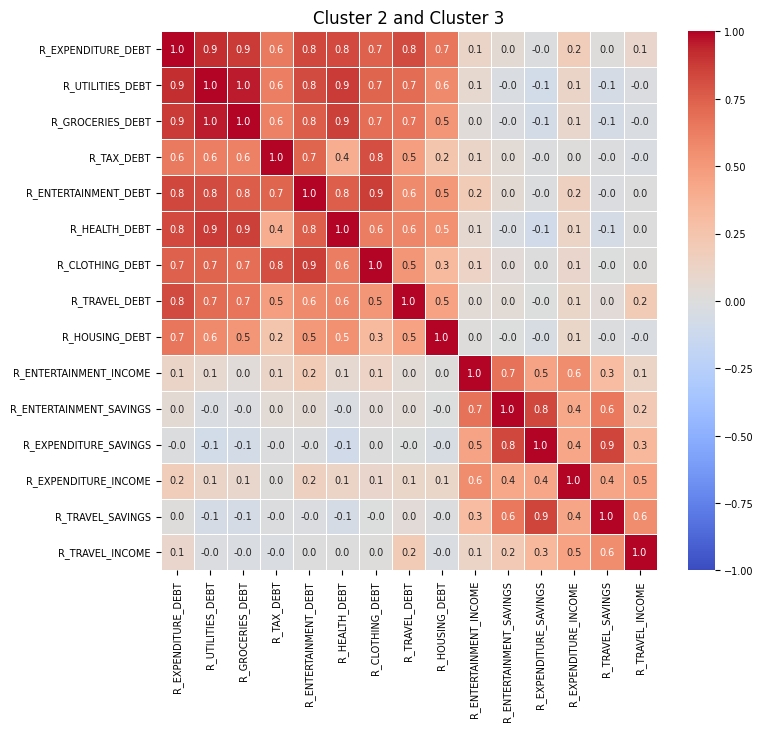

In [52]:
corr = df_features[np.append(c2_features, c3_features)].corr()

plt.figure(figsize = (8,7))
sns.heatmap(corr,
            annot = True,
            cmap = 'coolwarm',
            linewidths=0.5,
            fmt = '.1f',
            annot_kws = {'size': 7},
            vmin = -1, vmax = 1)
plt.title('Cluster 2 and Cluster 3')
plt.xticks(size = 7)
plt.yticks(size = 7)

# change the size of the colorbar labels
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=7)
plt.xticks(size = 7)
plt.yticks(size = 7)